In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.svm import LinearSVC, NuSVC, LinearSVR, NuSVR
import matplotlib.pyplot as plt
#########################################################################

Ns = 100
offset = 3
loc = .3
scale = 0.25
data_0 = np.random.normal(loc=-loc+offset, scale=scale, size=[Ns,1])
label_0 = np.zeros_like(data_0).ravel()
data_1 = np.random.normal(loc=loc+offset, scale=scale, size=[Ns,1])
label_1 = np.ones_like(data_0).ravel()
X_train = np.concatenate((data_0,data_1), axis=0)
y_train = np.concatenate((label_0,label_1), axis=0)

In [2]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 1,
 'classes_': array([0., 1.]),
 'n_iter_': array([13]),
 'coef_': array([[5.17234744]]),
 'intercept_': array([-15.51807882])}

In [3]:
def decision_surf(model,x):
    return model.intercept_ + model.coef_*x

def logistic_fun(x,w,w0):
    y = 1+np.exp(-w0-x*w)
    return 1/y

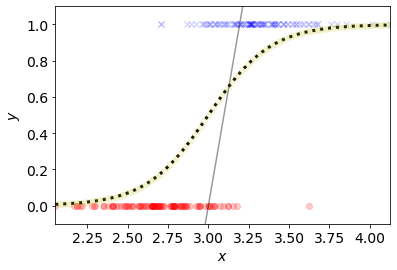

In [4]:
fontsize=14
alpha=0.2
plt.rcParams['figure.figsize'] = [6,4] #<- this makes the figures larger in Jupyter 
plt.plot(data_0,label_0, 'ro', alpha=alpha)
plt.plot(data_1,label_1, 'bx', alpha=alpha)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('$x$',fontsize=fontsize)
plt.ylabel('$y$',fontsize=fontsize)

# x_decision  = np.linspace(X_train.min(), X_train.max(), Ns)
x_decision  = np.linspace(X_train.min(), X_train.max(), Ns)
y_decision  = decision_surf(model, x_decision)
y_logistic = model.predict_proba(np.expand_dims(x_decision,axis=1))
y_logistic = y_logistic[:,1]
plt.plot(x_decision.ravel(), y_decision.ravel(), 'k', alpha=.4)
plt.plot(x_decision.ravel(), y_logistic.ravel(), 'k:', linewidth=3)
plt.axis([X_train.min(), X_train.max(), -0.1, 1.1])

y_fun = logistic_fun(x_decision,model.coef_,model.intercept_).ravel()
plt.plot(x_decision,y_fun,'yo', alpha=0.1)

plt.show() 